## Notebook to calculate the spectrum of $\Phi$ values for the p53 regulatory network in Gomez et al. 2021 (Fauré-Kaji Model )

In [7]:
import pyphi
import numpy as np
from pyphi import phi_spectrum
from pyphi import utils

# Transition probability matrix used in Gomez et al 2021

## Little End TPM: 
tpm = np.array([
    [1,1,0,1],
    [1,1,0,0],
    [1,1,0,0],
    [1,1,1,0],
    [1,1,0,1],
    [1,1,0,1],
    [1,1,0,1],
    [1,1,1,1],
    [0,0,0,1],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,1,0],
    [0,0,0,1],
    [0,0,0,1],
    [0,0,0,1],
    [0,0,1,1]
])

# Set up network object
network = pyphi.Network(tpm, node_labels=['P1','P2','Mc','Mn'])
print("Network = ",network.node_labels)

# Put the system into a given state
state = (0,0,0,1)
nodes = ['P1','P2','Mc','Mn']

## Get the requisite Subsystem
subsystem = pyphi.Subsystem(network, state, nodes)

## What does PyPhi Give?
pyphi_val = pyphi.compute.phi(subsystem)
print("PyPhi Value = ",pyphi_val)

## Calculate all Phi values
display_CES= False  # if True, output will display constellations
Phi_Spectrum = phi_spectrum.get_phi_spectrum(subsystem,display_CES)

print("\nCuts = ",Phi_Spectrum[0])
print("\nPhi Spectrum = ",Phi_Spectrum[1])

Computing concepts:   0%|          | 0/15 [00:00<?, ?it/s]

Network =  NodeLabels(('P1', 'P2', 'Mc', 'Mn'))


PyPhi Value =  0.25
	Number of Non-unique Constellations = 9

Evaluating Cut  Cut [P1] ━━/ /━━➤ [P2, Mc, Mn]
	Number of Non-unique Constellations = 3

Evaluating Cut  Cut [P2] ━━/ /━━➤ [P1, Mc, Mn]
	Number of Non-unique Constellations = 3

Evaluating Cut  Cut [P1, P2] ━━/ /━━➤ [Mc, Mn]
	Number of Non-unique Constellations = 3

Evaluating Cut  Cut [Mc] ━━/ /━━➤ [P1, P2, Mn]
	Number of Non-unique Constellations = 9

Evaluating Cut  Cut [P1, Mc] ━━/ /━━➤ [P2, Mn]
	Number of Non-unique Constellations = 3

Evaluating Cut  Cut [P2, Mc] ━━/ /━━➤ [P1, Mn]
	Number of Non-unique Constellations = 3

Evaluating Cut  Cut [P1, P2, Mc] ━━/ /━━➤ [Mn]
	Number of Non-unique Constellations = 1

Evaluating Cut  Cut [Mn] ━━/ /━━➤ [P1, P2, Mc]
	Number of Non-unique Constellations = 3

Evaluating Cut  Cut [P1, Mn] ━━/ /━━➤ [P2, Mc]
	Number of Non-unique Constellations = 1

Evaluating Cut  Cut [P2, Mn] ━━/ /━━➤ [P1, Mc]
	Number of Non-unique Constellations = 1

Evaluating Cut  Cut [P1, P2, Mn] ━━/ /━━➤ [Mc]
	

In [8]:
Phi_MIP = phi_spectrum.get_Phi_MIP(Phi_Spectrum)
print("Phi MIP = ",Phi_MIP)
print(len(Phi_MIP))
# np.savetxt("KO17/results/phi_spectrum_gomez_2021.csv", Phi_MIP, delimiter=",")
# print("Results Saved")

Phi MIP =  [0.25]
1


In [5]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

## Choose a font that renders the cut symbol properly
def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False


uni_char = "\u27A4"

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]
for i, font in enumerate(font_info):
    if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
        print(font[0], font[1])

/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf DejaVu Sans
/Library/Fonts/AppleGothic.ttf AppleGothic
/System/Library/Fonts/LastResort.ttf .LastResort
/System/Library/Fonts/ZapfDingbats.ttf Zapf Dingbats
/Library/Fonts/AppleMyungjo.ttf AppleMyungjo
/Library/Fonts/Arial Unicode.ttf Arial Unicode MS


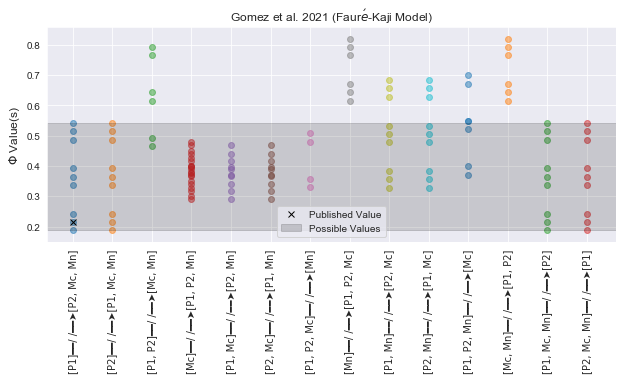

In [6]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
from pyphi import models
sns.set_style('darkgrid')
%matplotlib inline

## UTF Characters
LINE = "\u2501"
CUT_SYMBOL = LINE * 2 + "/ /" + LINE * 2 + "\u27A4"

## Set Font
# font_path = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font_path = '/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font = mfm.FontProperties(fname=font_path) # find this font

## Initialize fig, ax objects
fig = plt.figure(figsize=(8.8,5.4))
ax = plt.subplot(111)

## Plot published value and possible values
plt.plot([0],pyphi_val,'kx',label=r'Published Value')
ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible Values')
# ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible $\Phi^{Max}$ Values')

## Scatterplot Phi Values for each cut
x_labels = []
for i in range(len(Phi_Spectrum[0])):
    cut = Phi_Spectrum[0][i]
    
    ## Get label for cut
    from_nodes = models.fmt.fmt_mechanism(cut.from_nodes, cut.node_labels)
    to_nodes = models.fmt.fmt_mechanism(cut.to_nodes, cut.node_labels)
    cut_label = from_nodes+CUT_SYMBOL+to_nodes
    
    ## Plot
    plt.scatter([i]*len(Phi_Spectrum[1][i]),Phi_Spectrum[1][i],alpha=0.5)
    x_labels.append(cut_label)
    
## Clean Up
plt.title(r'Gomez et al. 2021 (Faur$\acute{e}$-Kaji Model)')
plt.ylabel(r'$\Phi$ Value(s)',fontsize=12)
plt.xticks(range(len(Phi_Spectrum[0])),x_labels,rotation=90,fontproperties=font)
# plt.ylim((0.0,1.0))
plt.legend()
# plt.legend(ncol=1,bbox_to_anchor = [1.25,1.0],prop=font,fontsize=12)
plt.tight_layout()
# plt.savefig("Gomez_2020.pdf")
plt.show()